In [800]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import warnings
warnings.filterwarnings("ignore")


In [801]:
df=pd.read_csv("bankloan.csv")
df=df.drop(["ID"],axis=1)
df.shape

(5000, 13)

In [802]:
df.head()

,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [803]:
df.size

65000

In [804]:
df.isnull().sum()

,0
Age,0
Experience,0
Income,0
ZIP.Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal.Loan,0
Securities.Account,0


In [805]:
df.duplicated().sum()

0

In [806]:
df.describe()

,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<Axes: >

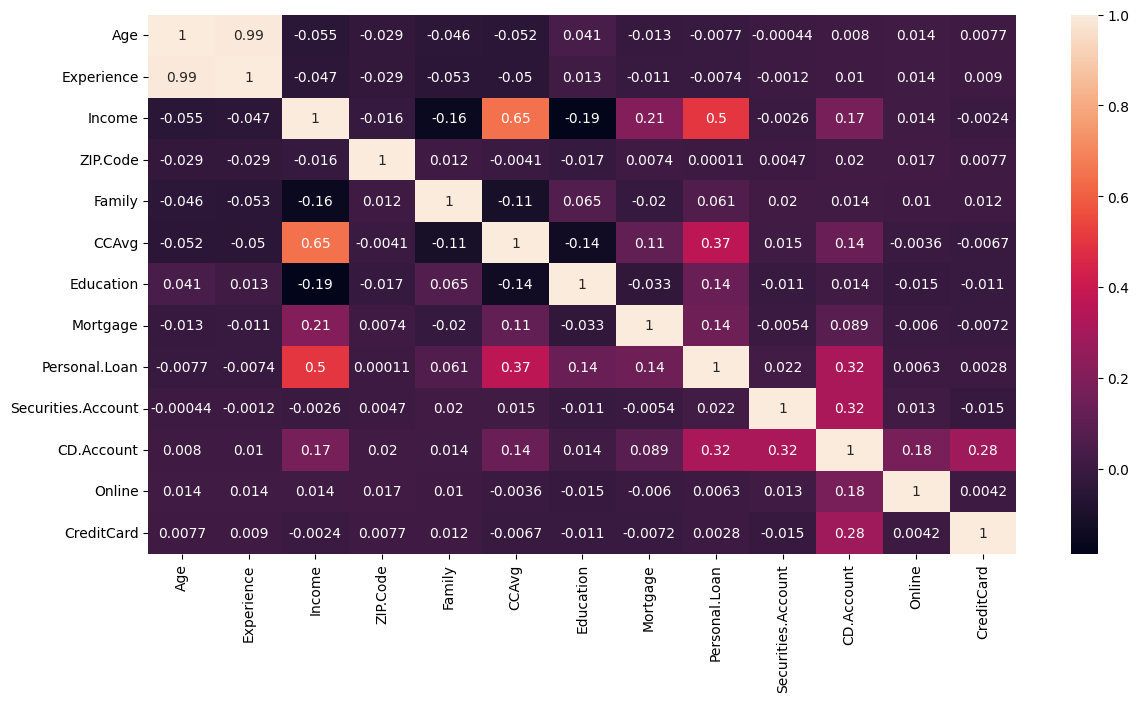

In [807]:
cor=df.corr()
plt.figure(figsize=(14,7))
sns.heatmap(cor,annot=True)

In [808]:
df_0=df[df["Personal.Loan"]==0]
df_1=df[df["Personal.Loan"]==1]
df_0=df_0.sample(n=500,random_state=42)
df_final=pd.concat([df_0,df_1],axis=0)

<Axes: >

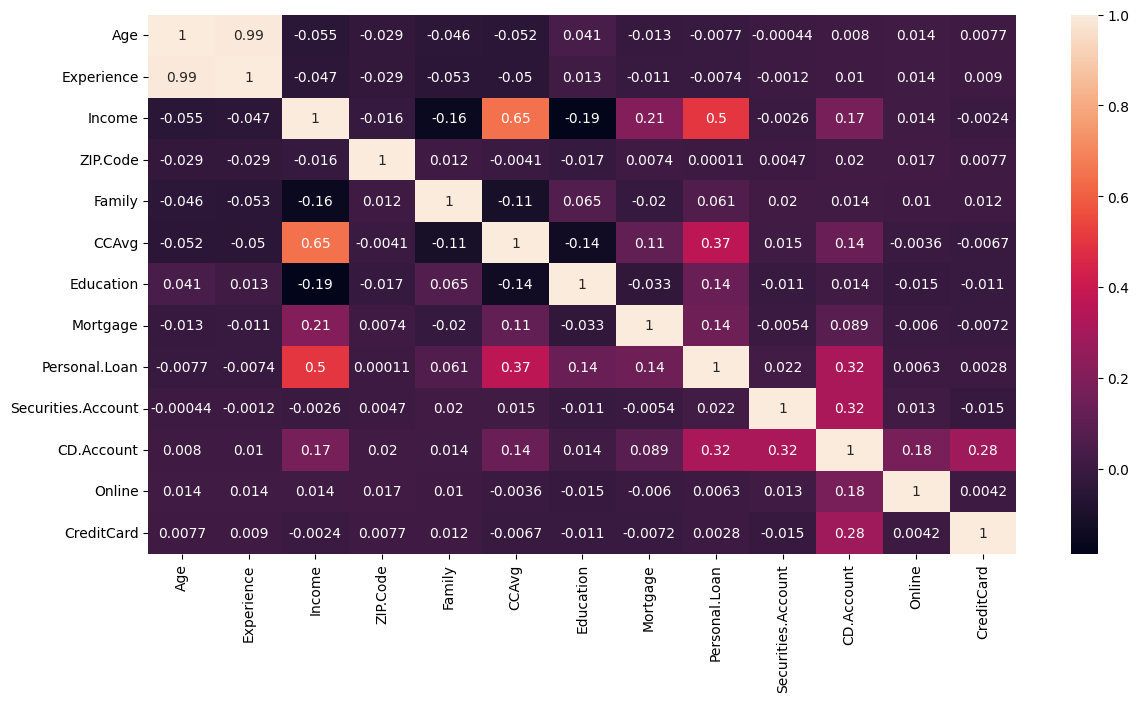

In [809]:
corr=df_final.corr()
plt.figure(figsize=(14,7))
sns.heatmap(cor,annot=True)

In [810]:
df=df_final.drop(["Experience","ZIP.Code","Online","CreditCard"],axis=1)
df=df.reset_index(drop=True)
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account
0,61,49,4,1.7,2,185,0,0,0
1,44,154,2,8.8,1,0,0,0,0
2,44,30,1,0.5,3,0,0,0,0
3,33,78,3,0.6,2,0,0,0,0
4,58,25,4,0.9,2,90,0,0,0


In [811]:
df.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal.Loan', 'Securities.Account', 'CD.Account'],
      dtype='object')

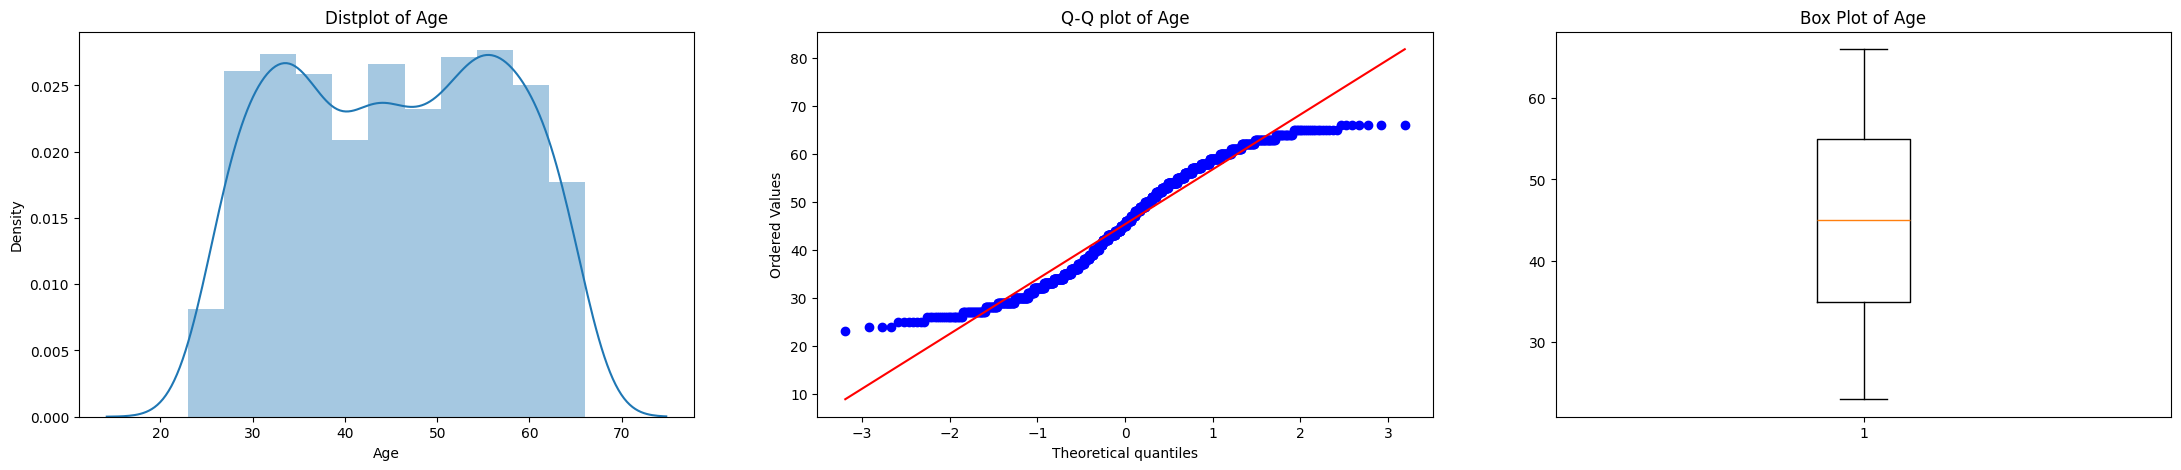

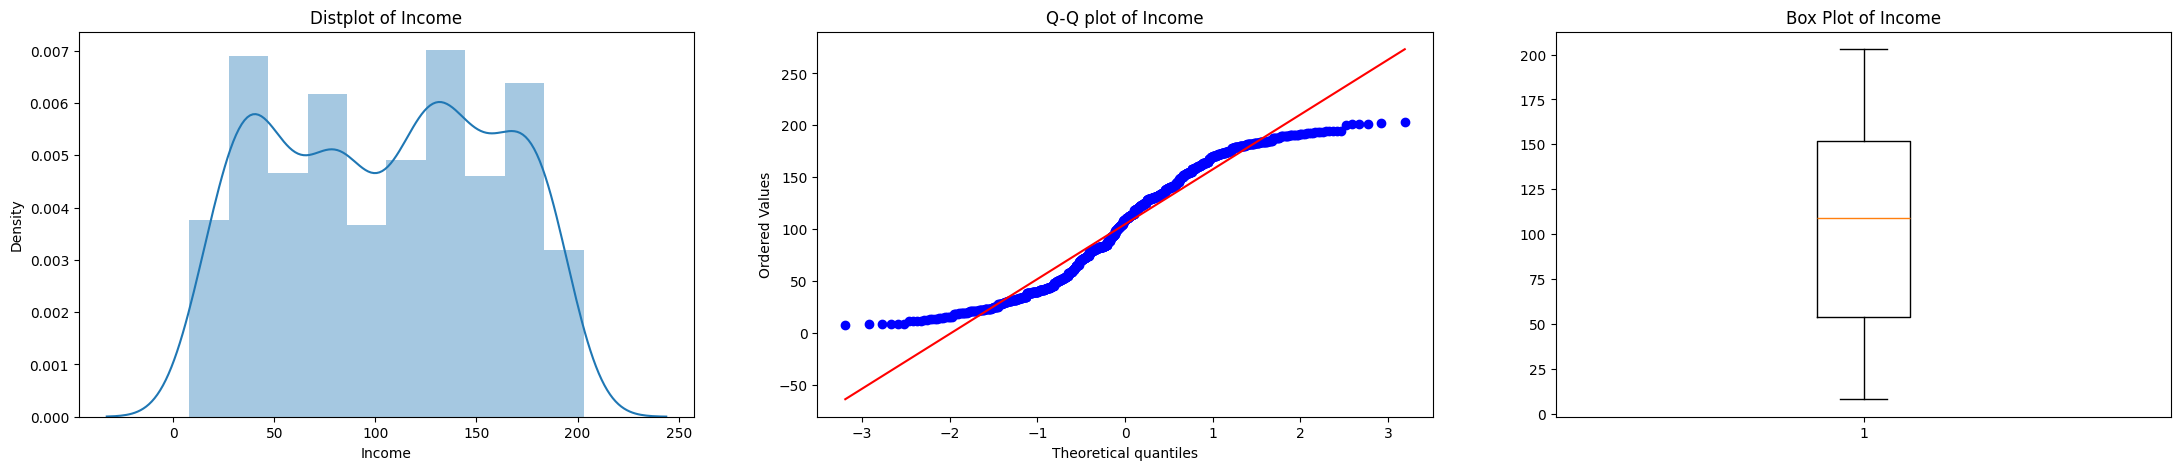

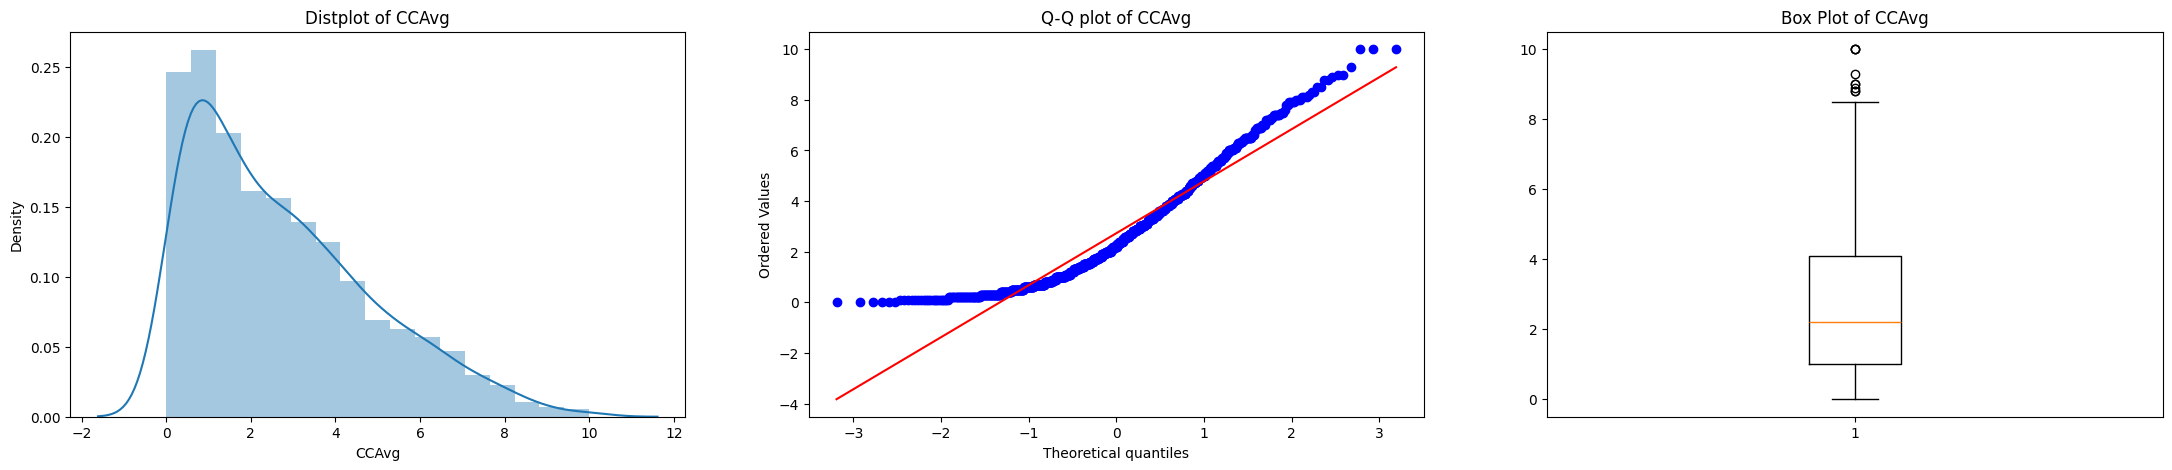

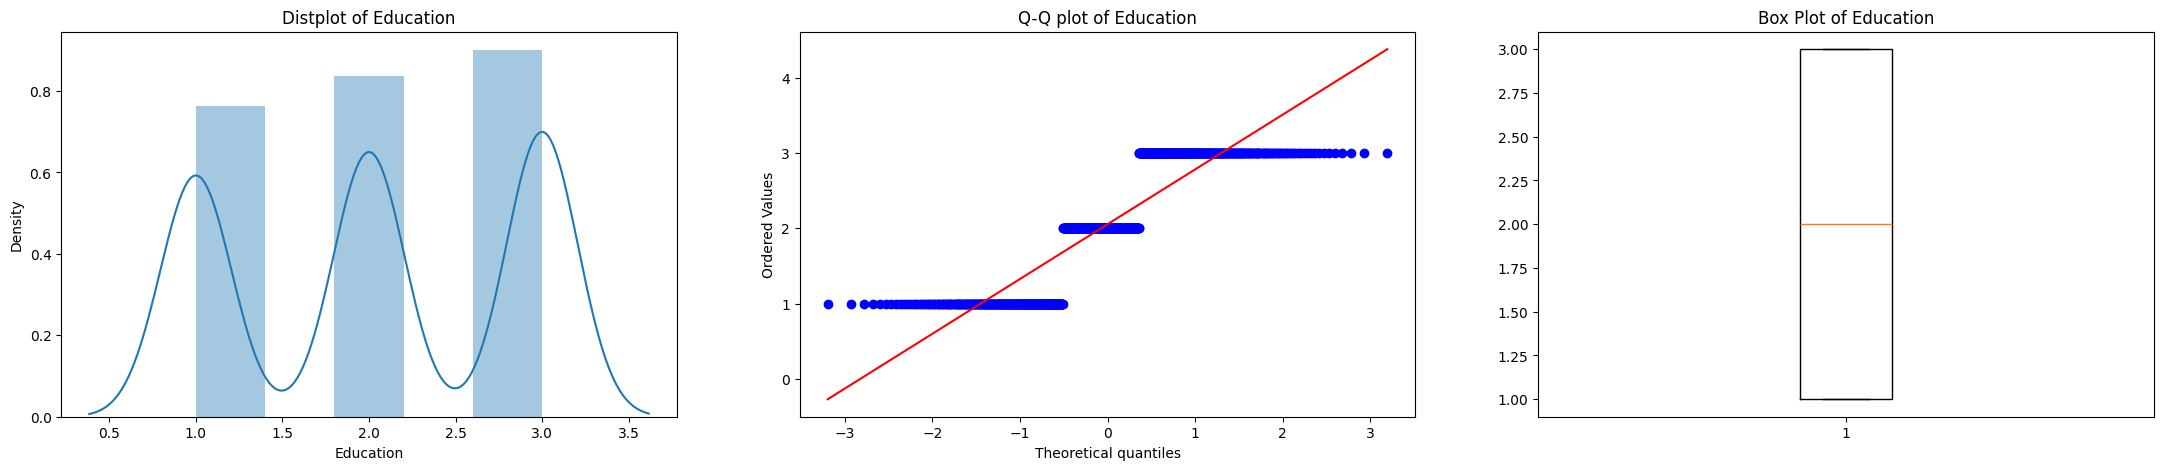

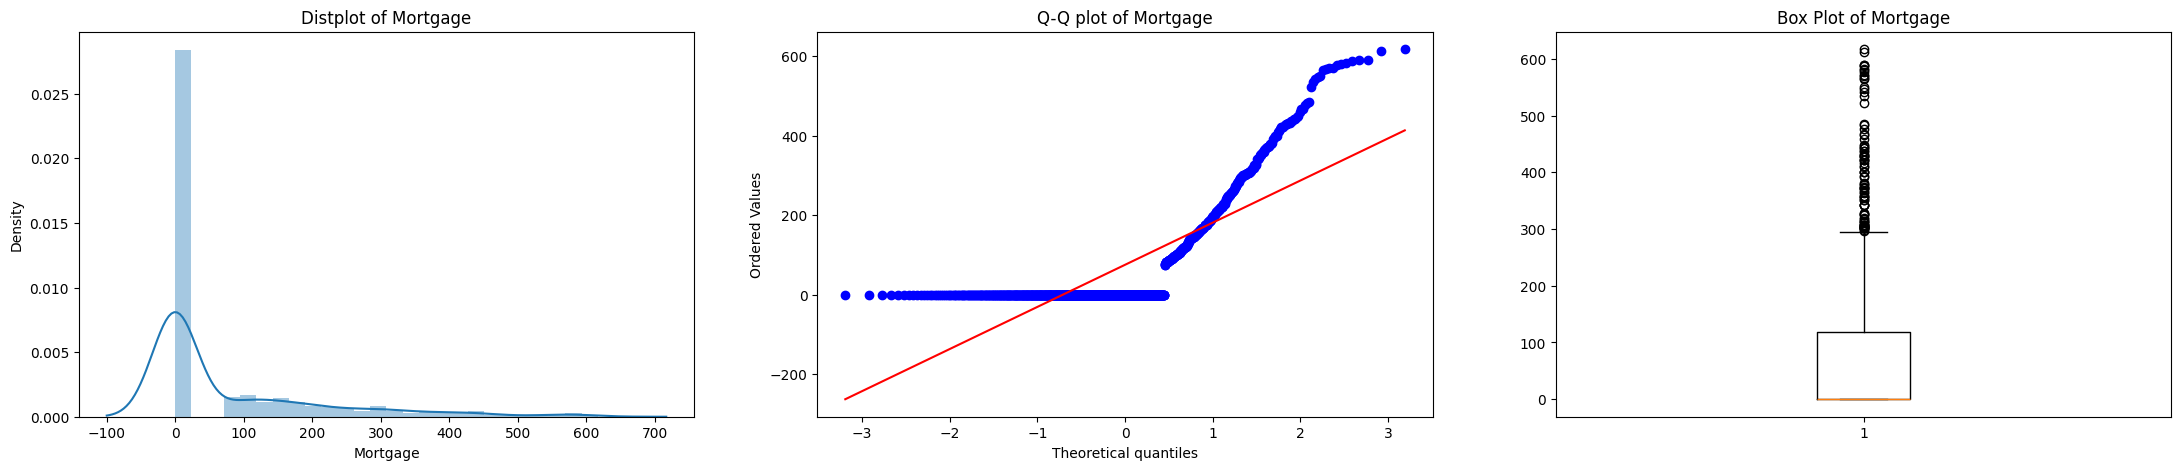

In [812]:
for i in df.columns[0:2].append(df.columns[3:6]):
  plt.figure(figsize=(27,5))
  plt.subplot(131)
  sns.distplot(df[i])
  plt.title(f"Distplot of {i}")

  plt.subplot(132)
  sts.probplot(df[i],plot=plt)
  plt.title(f"Q-Q plot of {i}")
  plt.subplot(133)
  plt.boxplot(df[i])
  plt.title(f"Box Plot of {i}")

  plt.show()

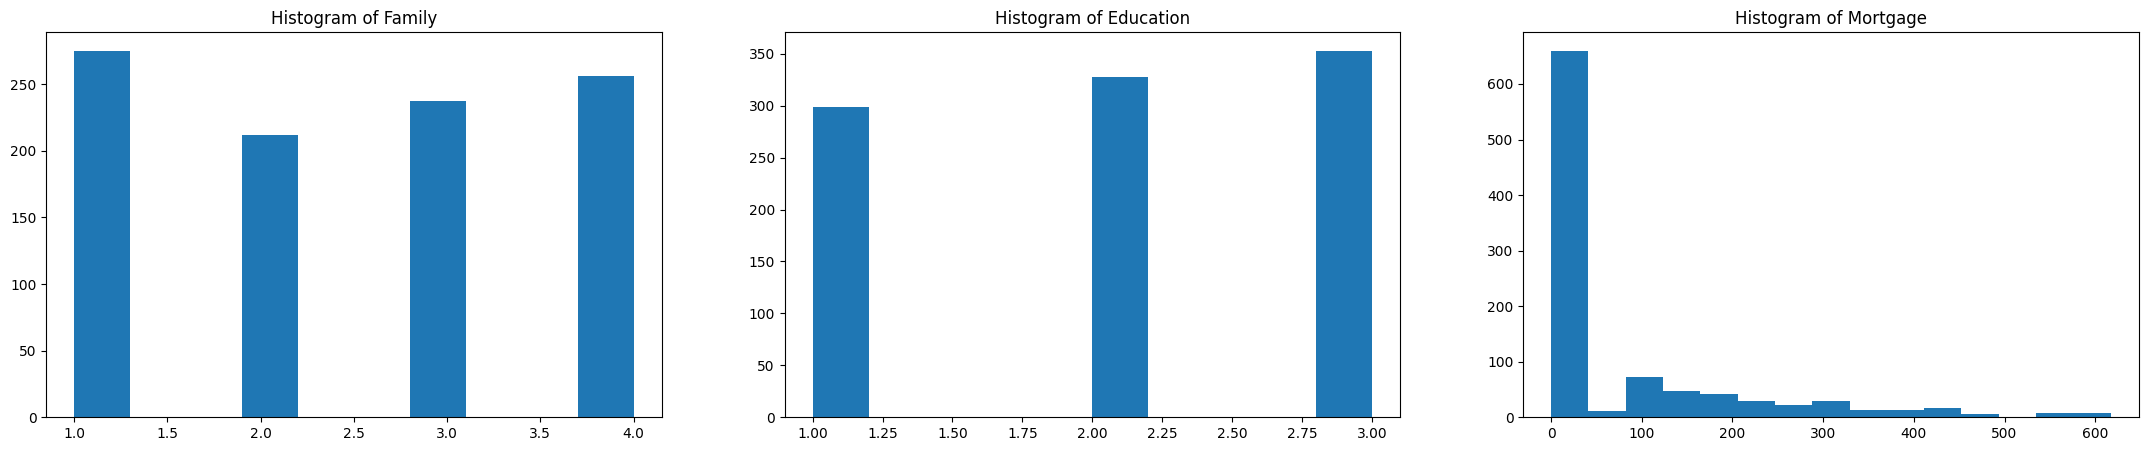

In [813]:
df_col=df.columns[2:3].append(df.columns[4:])
plt.figure(figsize=(27,5))
plt.subplot(131)
plt.hist(df[df_col[0]])
plt.title(f"Histogram of {df_col[0]}")

plt.subplot(132)
plt.hist(df[df_col[1]])
plt.title(f"Histogram of {df_col[1]}")

plt.subplot(133)
plt.hist(df[df_col[2]],bins=15)
plt.title(f"Histogram of {df_col[2]}")
plt.show()

Text(0.5, 1.0, 'Histogram of CD.Account')

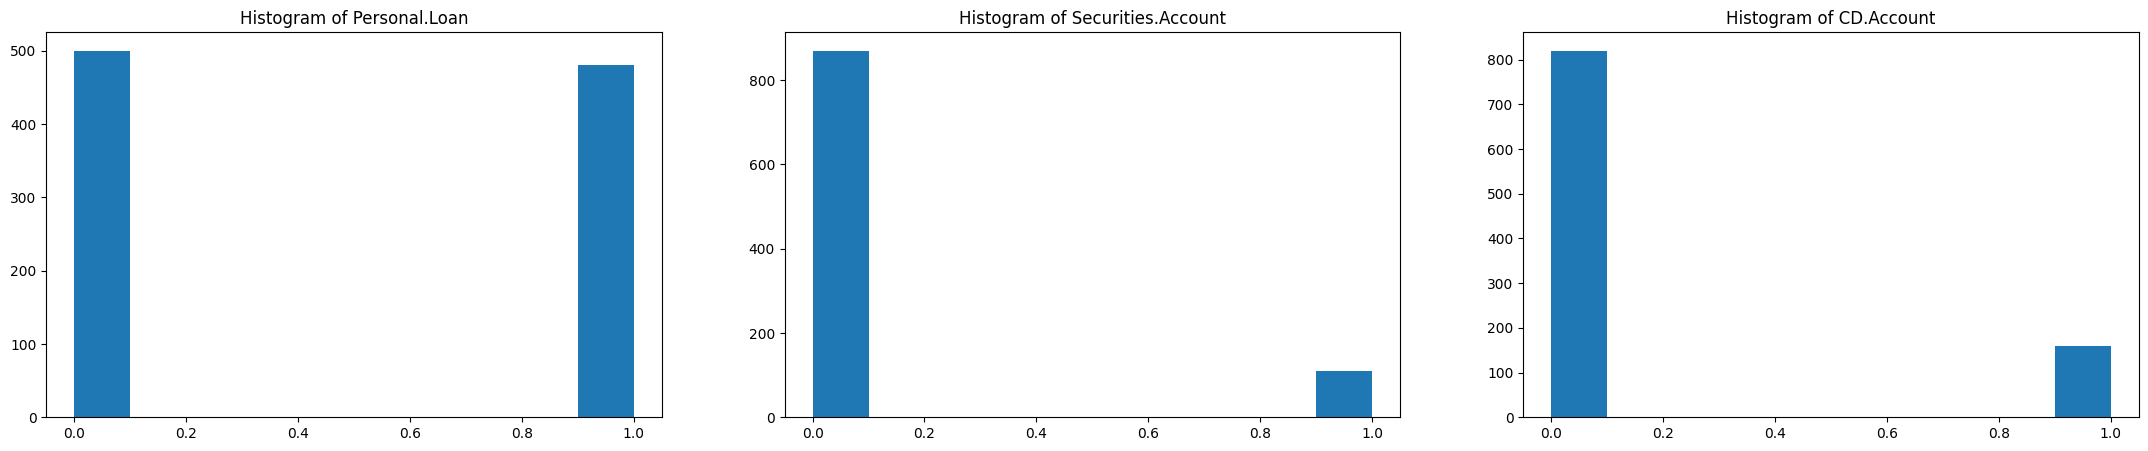

In [814]:
df_col=df.columns[2:3].append(df.columns[4:])
plt.figure(figsize=(27,5))
plt.subplot(131)
plt.hist(df[df_col[3]])
plt.title(f"Histogram of {df_col[3]}")

plt.subplot(132)
plt.hist(df[df_col[4]])
plt.title(f"Histogram of {df_col[4]}")

plt.subplot(133)
plt.hist(df[df_col[5]])
plt.title(f"Histogram of {df_col[5]}")

In [815]:
df_0={}

for i in df_col[3:]:
  val=df[i][df[i]==0].count()
  df_0[(i+"_"+"No")]=val

df_0

{'Personal.Loan_No': 500, 'Securities.Account_No': 870, 'CD.Account_No': 820}

In [816]:
df_1={}

for i in df_col[3:]:
  val=df[i][df[i]==1].count()
  df_1[(i+"_"+"yes")]=val

df_1

{'Personal.Loan_yes': 480,
 'Securities.Account_yes': 110,
 'CD.Account_yes': 160}

In [817]:
dframe_0=pd.DataFrame([df_0])
dframe_1=pd.DataFrame([df_1])
df_final_count=pd.concat([dframe_0,dframe_1],axis=1)
df_final_count

,Personal.Loan_No,Securities.Account_No,CD.Account_No,Personal.Loan_yes,Securities.Account_yes,CD.Account_yes
0,500,870,820,480,110,160


In [818]:
df.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account
0,61,49,4,1.7,2,185,0,0,0
1,44,154,2,8.8,1,0,0,0,0
2,44,30,1,0.5,3,0,0,0,0
3,33,78,3,0.6,2,0,0,0,0
4,58,25,4,0.9,2,90,0,0,0


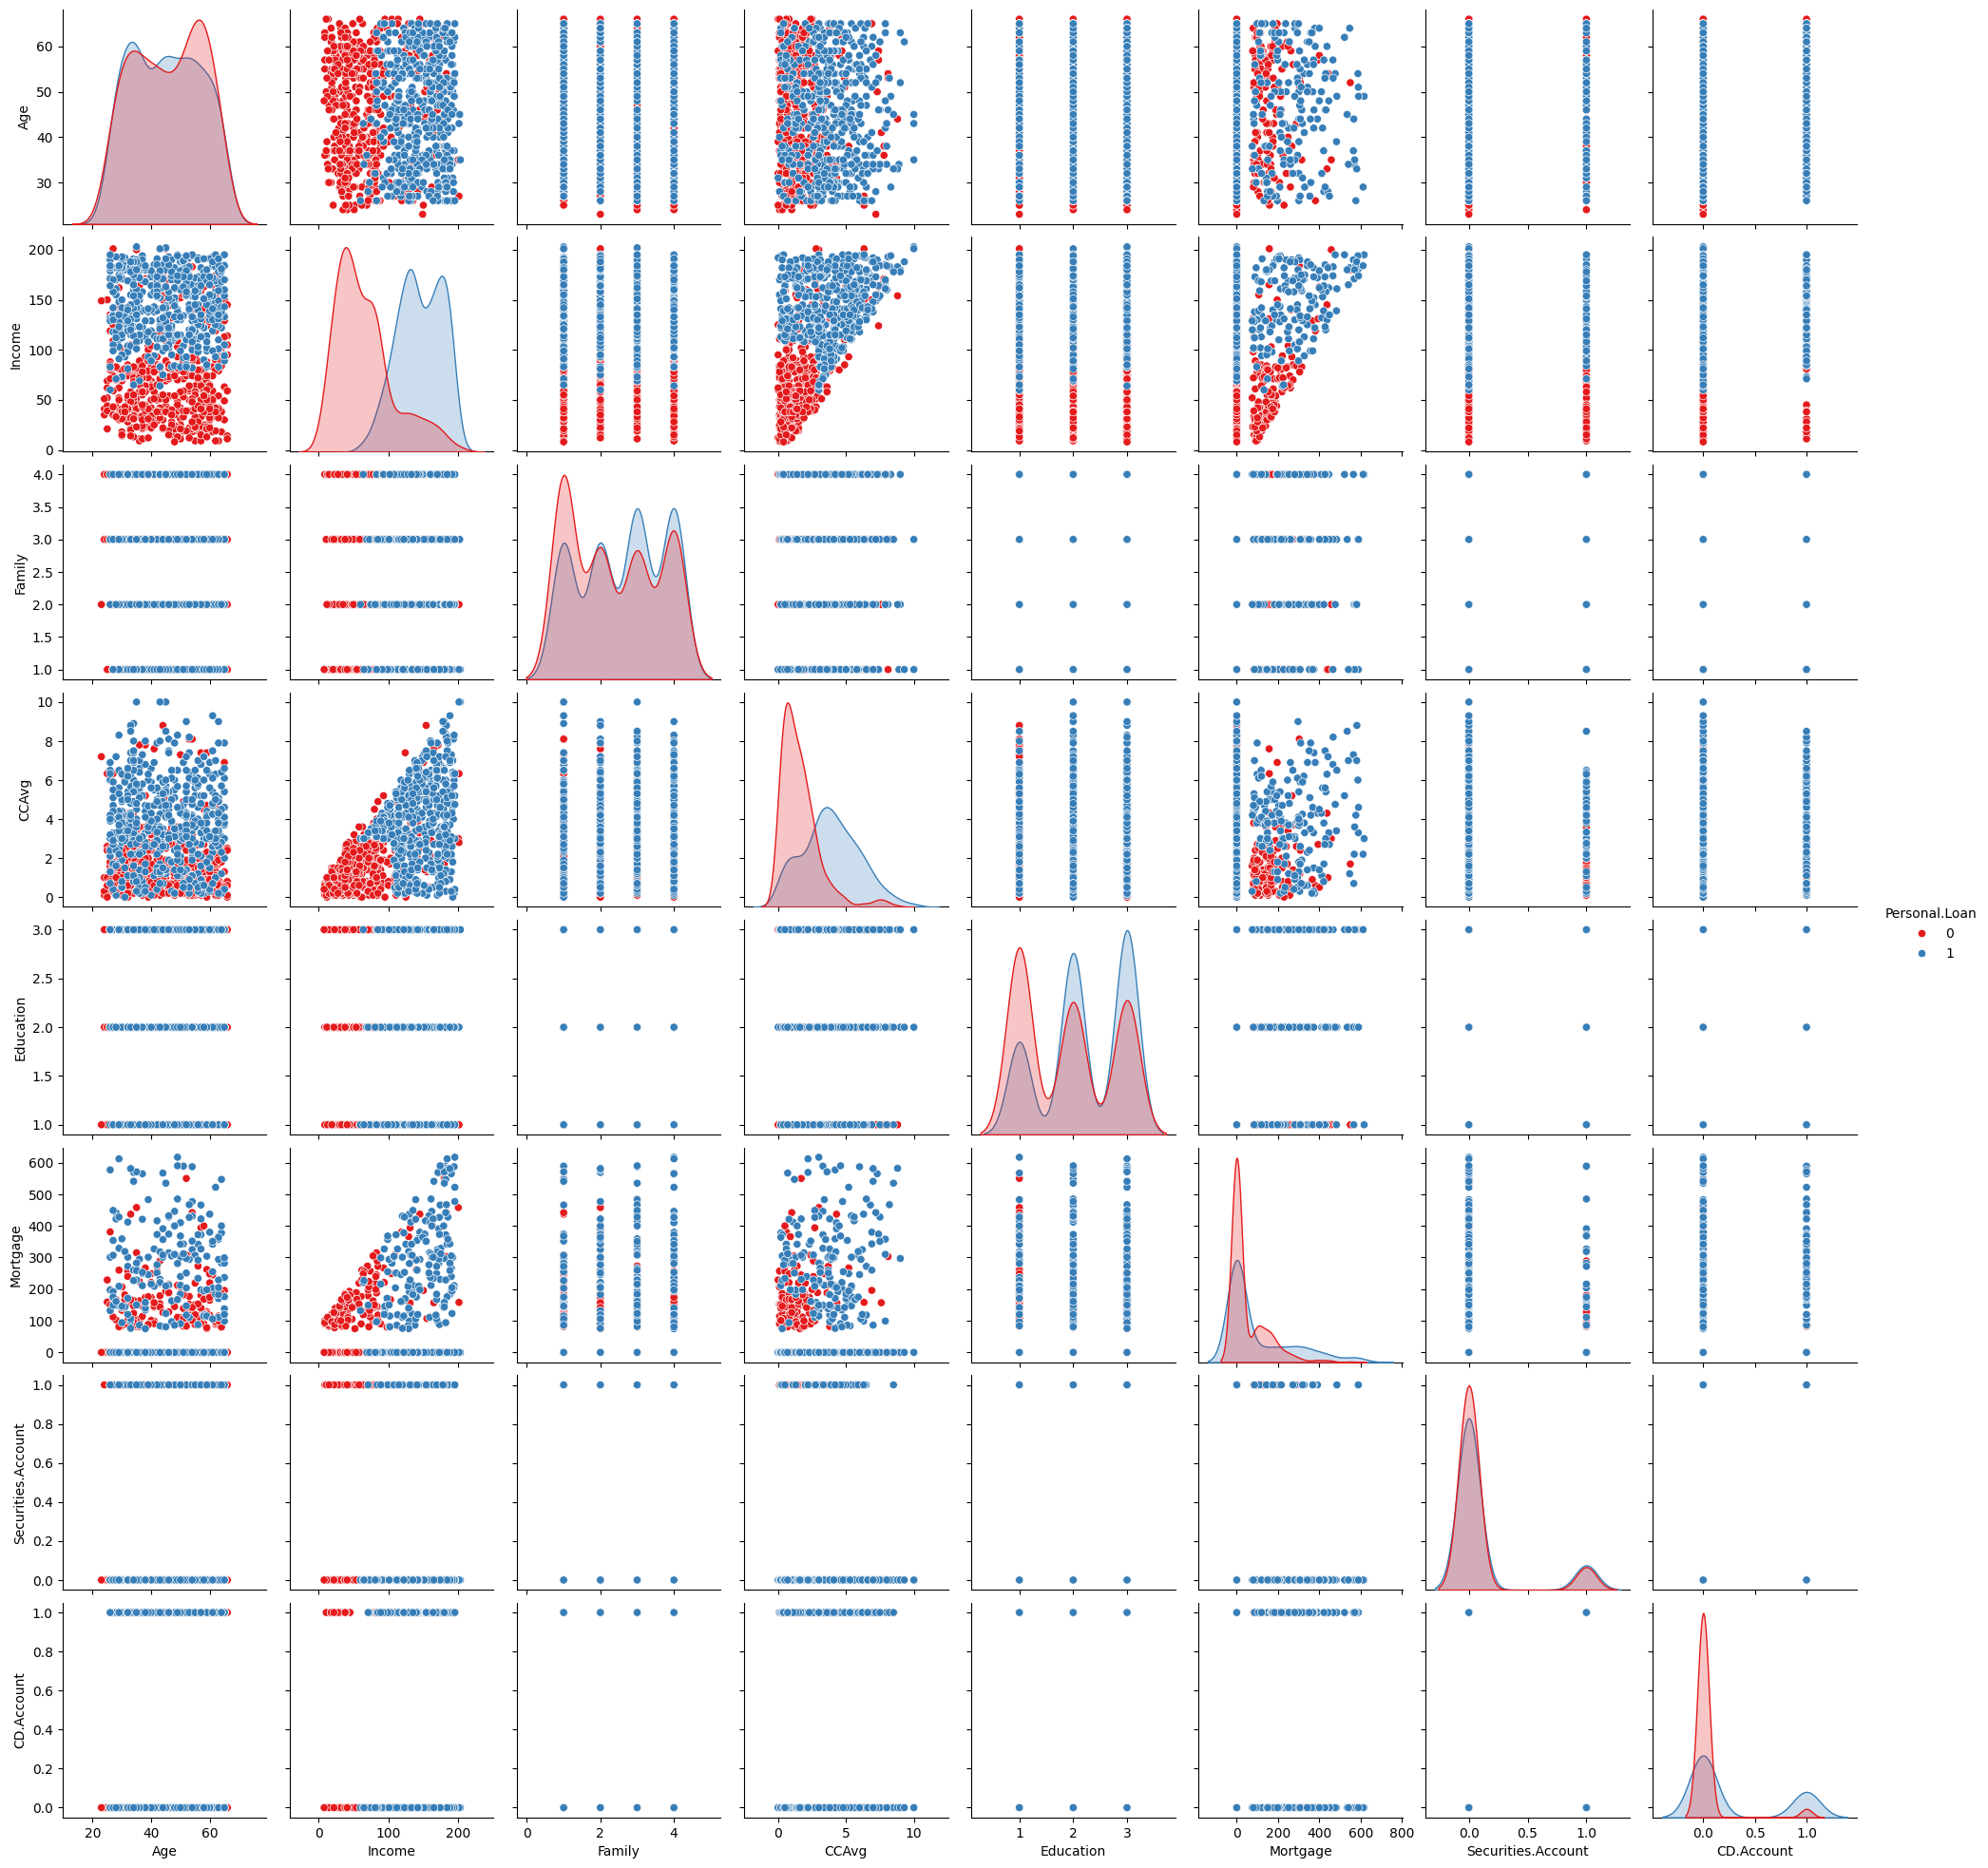

In [819]:
sns.pairplot(df,hue="Personal.Loan",palette="Set1")

In [820]:
# from ydata_profiling import ProfileReport
# prof=ProfileReport(df)
# prof.to_file(output_file="bankloan.html")

In [821]:
Q1=df["CCAvg"].quantile(0.25)
Q3=df['CCAvg'].quantile(0.75)
IQR=Q3-Q1
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
filt_df=df[(df['CCAvg']>=lower_lim) & (df["CCAvg"]<=upper_lim)]
filt_df.shape
filt_df.describe()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account
count,971.000000,971.000000,971.000000,971.00000,971.000000,971.000000,971.000000,971.000000,971.000000
mean,45.346035,103.962925,2.489186,2.66932,2.051493,74.902163,0.486097,0.113285,0.164779
std,11.674350,53.663582,1.155282,2.04586,0.814448,131.130547,0.500064,0.317105,0.371172
min,23.000000,8.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,54.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,109.000000,3.000000,2.20000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,150.000000,4.000000,4.00000,3.000000,118.500000,1.000000,0.000000,0.000000
max,66.000000,201.000000,4.000000,8.50000,3.000000,617.000000,1.000000,1.000000,1.000000


In [822]:
filt_df.isnull().sum()

,0
Age,0
Income,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal.Loan,0
Securities.Account,0
CD.Account,0


In [823]:
x=filt_df.drop(["Personal.Loan"],axis=1)
y=filt_df["Personal.Loan"]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(f"The shape of X_train is {X_train.shape}\n The shape of X_test is {X_test.shape}\n The shape of Y_train is {Y_train.shape} \n The shape of Y_test is {Y_test.shape}")

The shape of X_train is (776, 8)
 The shape of X_test is (195, 8)
 The shape of Y_train is (776,) 
 The shape of Y_test is (195,)


In [824]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test),columns=X_train.columns)
X_train_scaled.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account
0,0.413723,1.071561,1.328482,0.794900,1.160912,2.526139,-0.355345,-0.444444
1,-0.538688,0.022570,-1.301370,0.647777,1.160912,-0.575779,-0.355345,2.250000
2,0.413723,-1.532184,-1.301370,-1.215781,-1.310604,0.097564,-0.355345,-0.444444
3,1.539299,-1.326132,-1.301370,-0.382084,-0.074846,0.180786,-0.355345,-0.444444
4,1.279551,0.977901,-1.301370,-0.578248,1.160912,-0.575779,-0.355345,-0.444444


In [836]:
from sklearn.preprocessing import FunctionTransformer
trf=FunctionTransformer(func=np.log1p)
X_train_trans=X_train
X_test_trans=X_test
X_train_trans["Mortgage"]=trf.fit_transform(X_train["Mortgage"])
X_test_trans["Mortgage"]=trf.transform(X_test["Mortgage"])
X_train_trans.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities.Account,CD.Account
871,50,160,4,4.3,3,6.018593,0,0
193,39,104,1,4.0,3,0.000000,0,1
310,50,21,1,0.2,1,4.499810,0,0
478,63,32,1,1.9,2,4.615121,0,0
904,60,155,1,1.5,3,0.000000,0,0


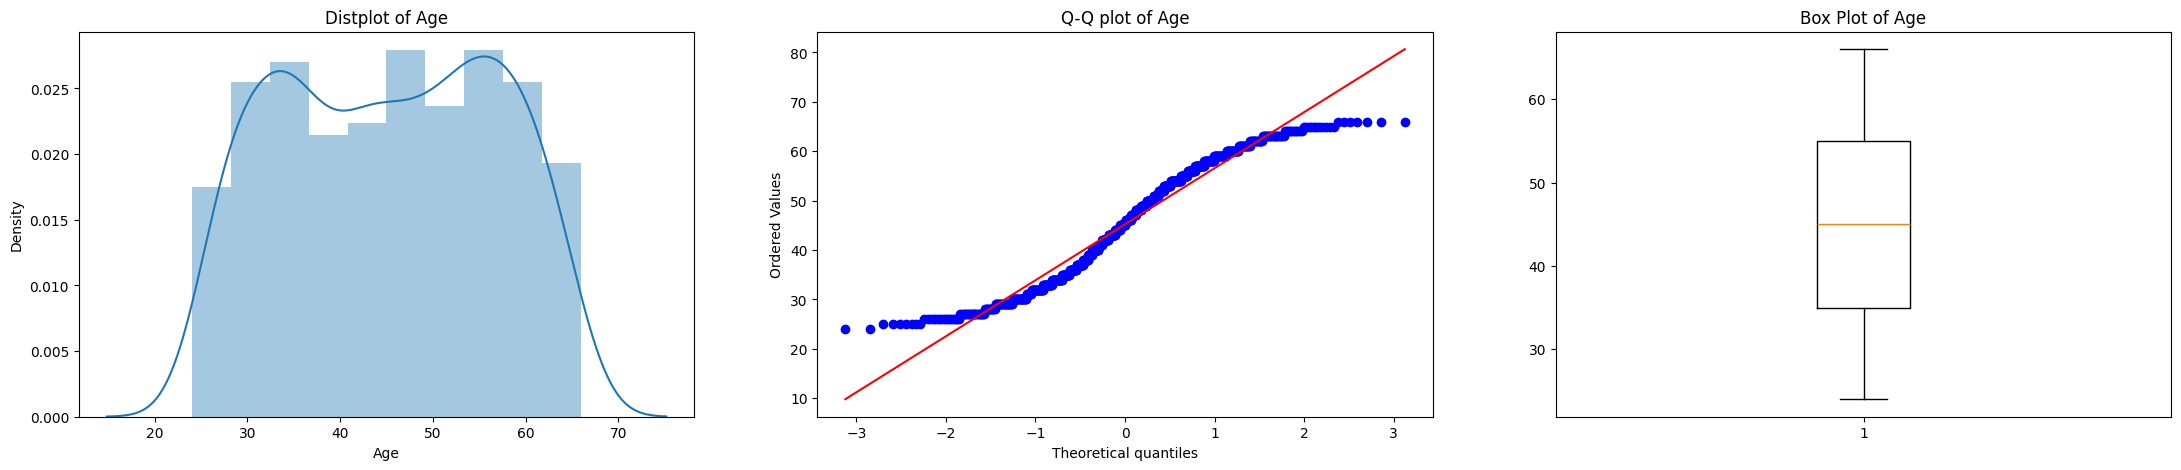

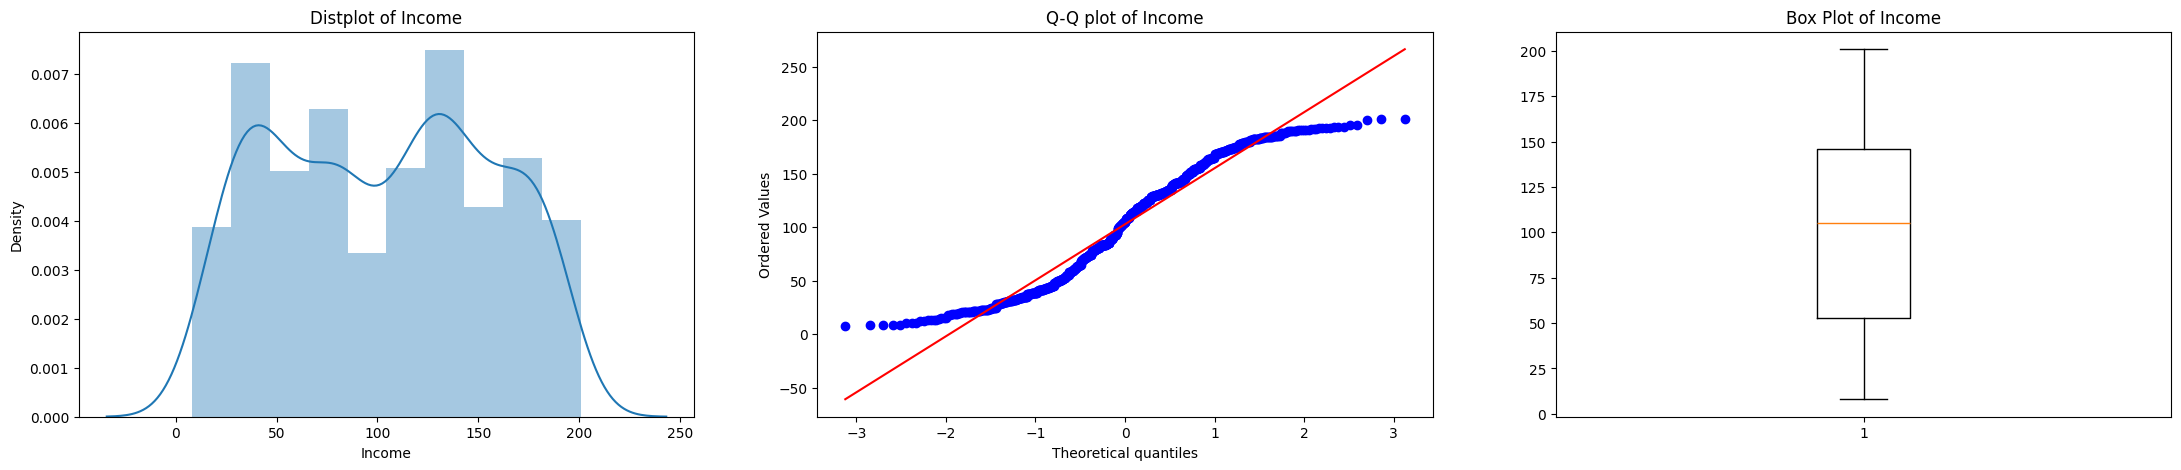

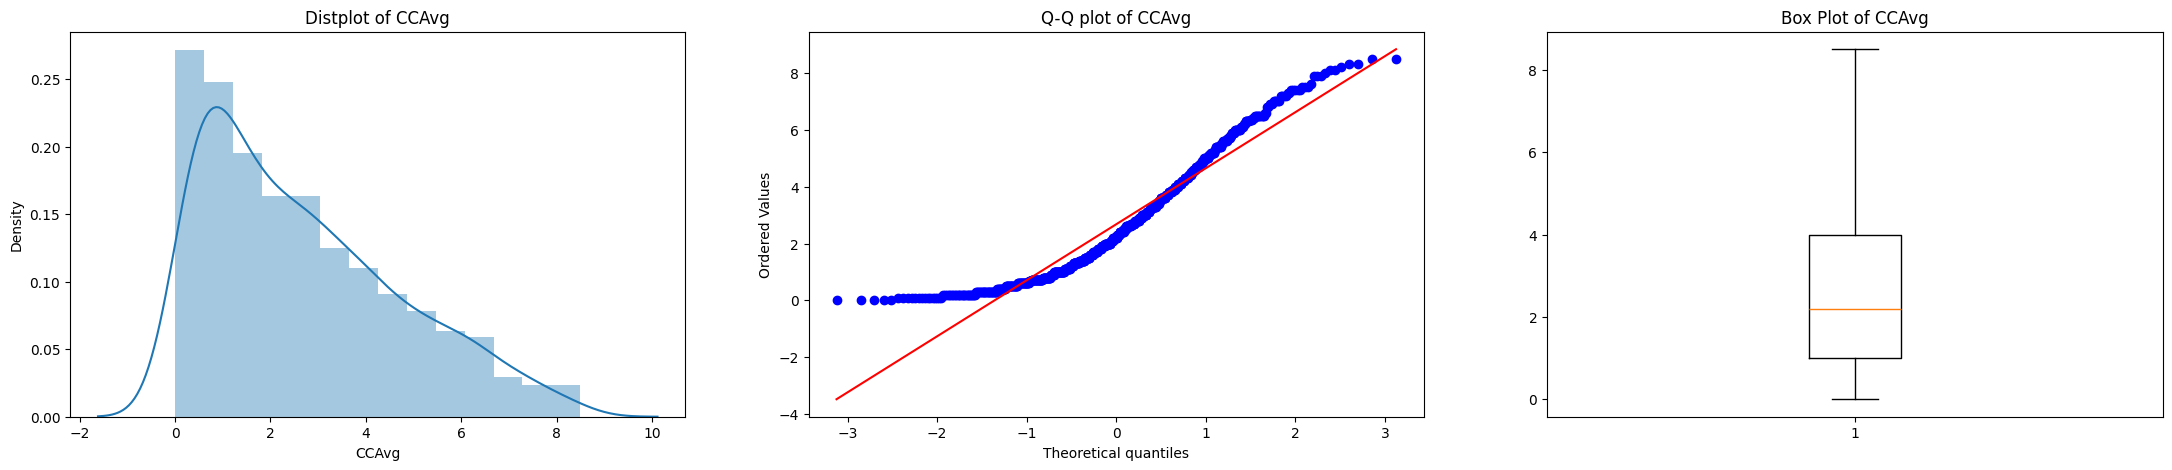

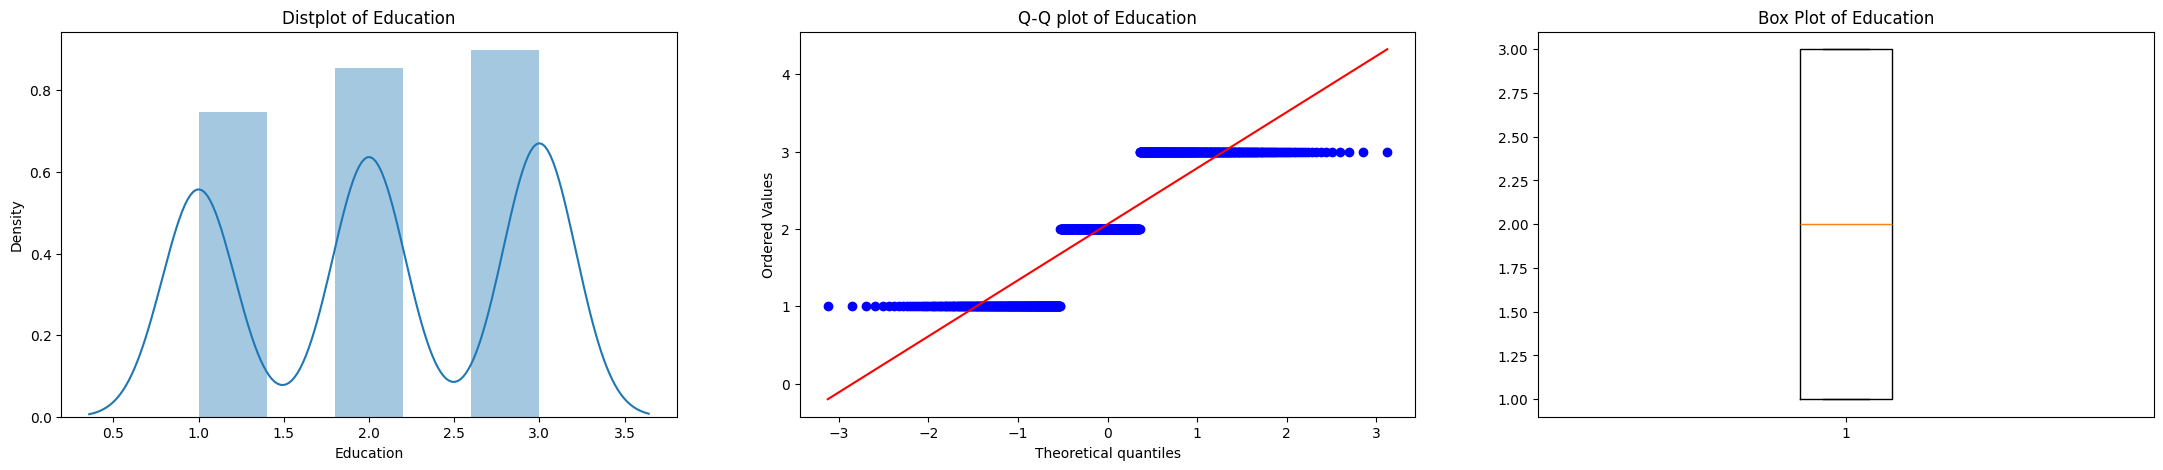

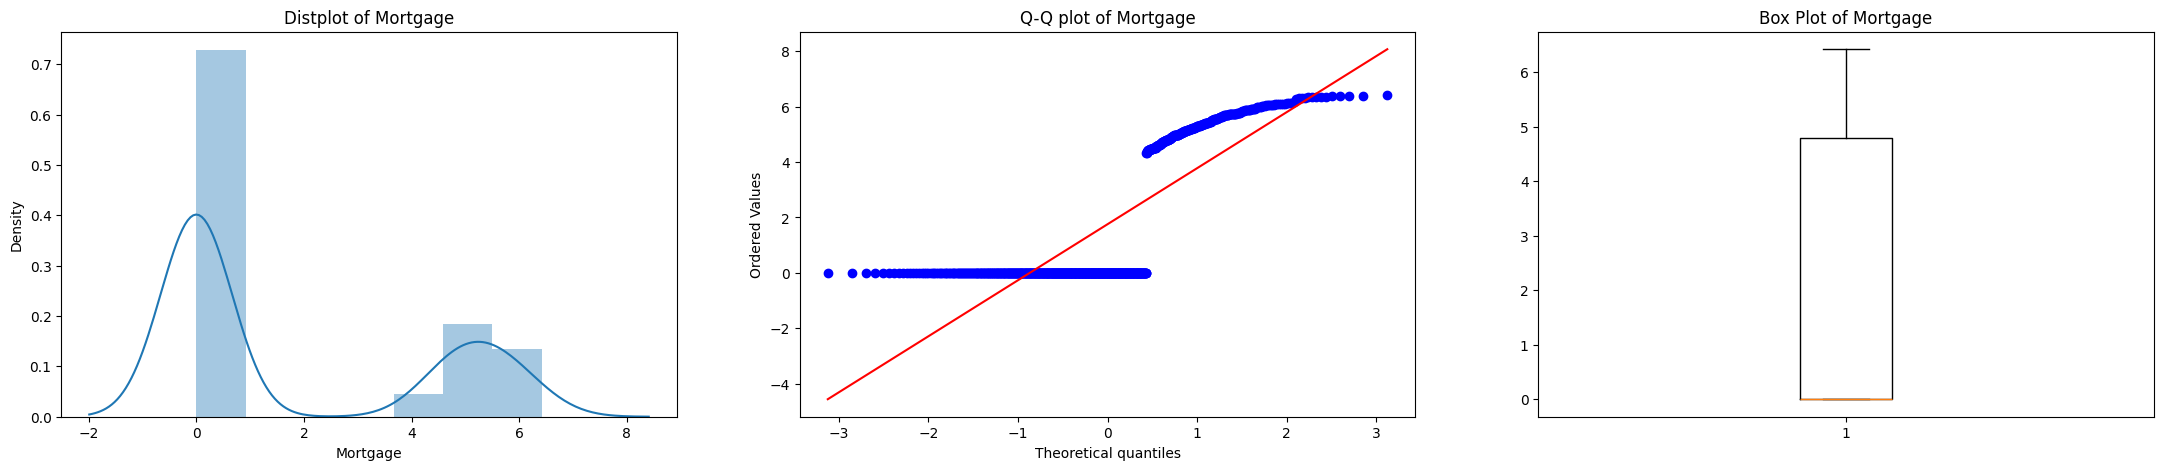

In [837]:
for i in X_train_trans.columns[0:2].append(X_train_trans.columns[3:6]):
  plt.figure(figsize=(27,5))
  plt.subplot(131)
  sns.distplot(X_train_trans[i])
  plt.title(f"Distplot of {i}")

  plt.subplot(132)
  sts.probplot(X_train_trans[i],plot=plt)
  plt.title(f"Q-Q plot of {i}")
  plt.subplot(133)
  plt.boxplot(X_train_trans[i])
  plt.title(f"Box Plot of {i}")

  plt.show()

In [838]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
para={"n_estimators":[10,20,30,40,50],"max_depth":[10,20,30],"max_features":["auto","log2"]}
model_rf=RandomForestClassifier()
clf=GridSearchCV(model_rf,para,cv=5)
clf.fit(x,y)
best_para=clf.best_params_
best_score=round(clf.best_score_,3)
print(f'The Best paramter are {best_para}\n The best Score is {best_score}')

The Best paramter are {'max_depth': 30, 'max_features': 'log2', 'n_estimators': 20}
 The best Score is 0.973


In [839]:
model=RandomForestClassifier(max_depth=20,max_features="sqrt",n_estimators=50)
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)

In [840]:
scaled_model=RandomForestClassifier(max_depth=20,max_features="log2",n_estimators=50)
scaled_model.fit(X_train_scaled,Y_train)
y_pred_scaled=scaled_model.predict(X_test_scaled)

In [841]:
trans_model=RandomForestClassifier(max_depth=20,max_features="log2",n_estimators=50)
trans_model.fit(X_train_trans,Y_train)
y_pred_trans=trans_model.predict(X_test_trans)

In [842]:
model.score(X_test,Y_test)

0.9692307692307692

In [843]:
scaled_model.score(X_test_scaled,Y_test)

0.9641025641025641

In [844]:
trans_model.score(X_test_trans,Y_test)

0.9641025641025641

Text(50.722222222222214, 0.5, 'Truth')

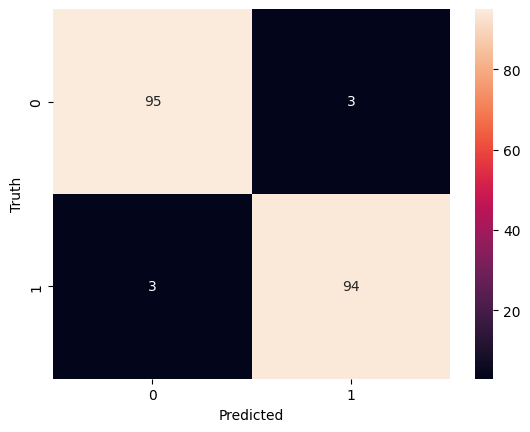

In [845]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(Y_test,y_pred)
sns.heatmap(con,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [846]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        98
           1       0.97      0.97      0.97        97

    accuracy                           0.97       195
   macro avg       0.97      0.97      0.97       195
weighted avg       0.97      0.97      0.97       195

